<a href="https://colab.research.google.com/github/heesukjang/Income_Prediction/blob/main/Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Income Prediction](https://www.kaggle.com/datasets/mastmustu/income)
## Goal: Predict income based on different job types using ML ensemble methods
### Original Question: "is the salary of the person is greater than $50K ? "

In [66]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statistics import variance, stdev, mode
import random
import os

# load packages-classifiers
from scipy import interp
from scipy import stats
from collections import Counter
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *                            # confusion_matrix
from sklearn.model_selection import *                    # train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.linear_model import *                       # LinearRegression
from sklearn.discriminant_analysis import *
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_decision_regions
import tensorflow as tf
from tensorflow.keras import initializers
# random.seed(2)

# visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from IPython.display import display_html, Image

pd.options.display.float_format = '{:.2f}'.format
sns.set(style='whitegrid', palette='muted', font_scale=2)
mpl.rcParams['figure.figsize'] = (8,6)
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 15

mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)

## Interactive pandas data table
# from google.colab import data_table   # alternative: %load_ext google.colab.data_table
# data_table.enable_dataframe_formatter()

# Load dataset directly from Kaggle to Colab coordinating with Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"  

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:
# !pip install heatmap

## 1. Import data from Google Drive
- train.csv
- test.csv

In [68]:
df_test = pd.read_csv('/content/gdrive/MyDrive/Kaggle/test.csv')
print(df_test.shape)
print(df_test.columns)
df_test.info()

(899, 14)
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-

In [69]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Kaggle/train.csv')
print(df_train.shape)
print(df_train.columns)
df_train.info()

(43957, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-

## 2. Rename column header


In [72]:
col_header = ['age', 'job_type', 'finacial_weight', 'education', 'edu_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
df_test.columns = col_header
print(df_test.shape)
df_test.head()

(899, 14)


,age,job_type,finacial_weight,education,edu_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [73]:
col_header.append("income_>50K")
df_train.columns = col_header
print(df_train.shape)
df_train.head()

(43957, 15)


,age,job_type,finacial_weight,education,edu_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [64]:
print(len(df_train.education.unique()), '\n', df_train.education.unique())
print(len(df_train.edu_num.unique()), '\n', df_train.edu_num.unique())

16 
 ['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm']
16 
 [16  8 13  4 10  9  5  6  7 14  1  3 15 11  2 12]


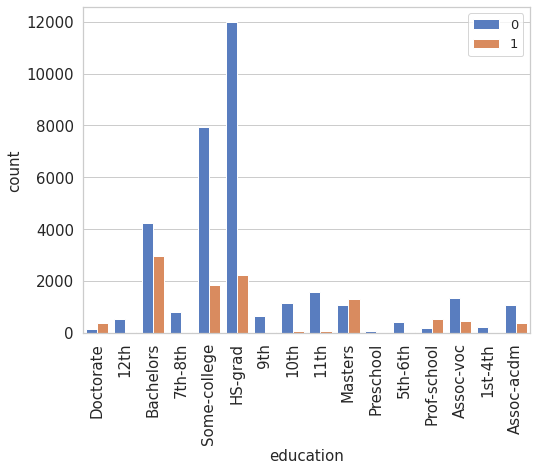

In [91]:
sns.countplot(data=df_train, x='education', hue='income_>50K')
plt.xticks(rotation=90)
plt.legend(fontsize=13);

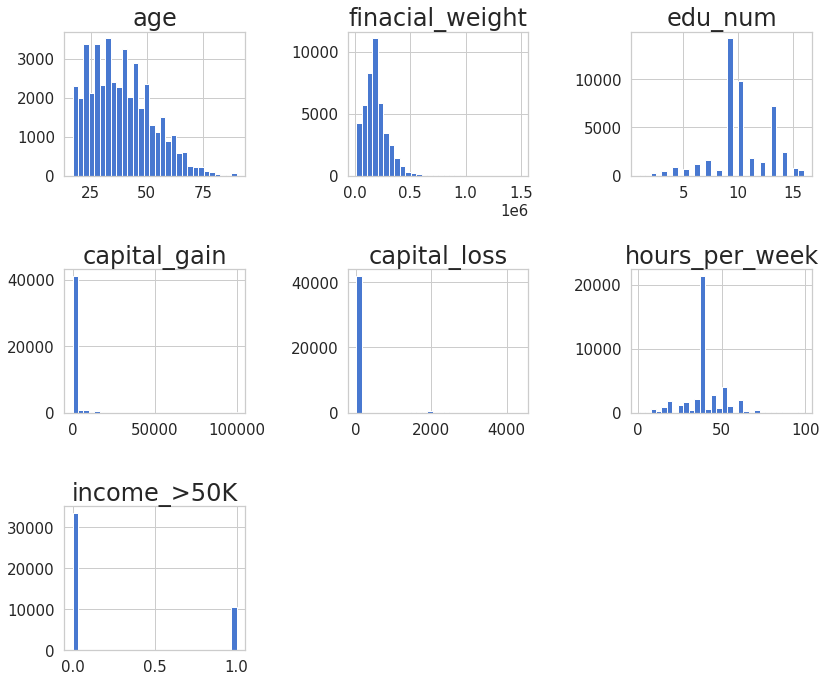

In [82]:
df_train.hist(figsize=(12,10), bins=30)
plt.tight_layout()

## 3. Check Train/Test Split


In [4]:
train_size = round(df_train.shape[0]/(df_train.shape[0] + df_test.shape[0])*100)
test_size = 100 - train_size
print(f'train/test split by {train_size}%/{test_size}%')

train/test split by 98%/2%


In [60]:
print(len(df_train.occupation.unique()))
df_train.occupation.unique()

15


array(['Exec-managerial', 'Other-service', 'Transport-moving',
       'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Prof-specialty',
       'Craft-repair', nan, 'Tech-support', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [61]:
df_train.describe()
# df_train.describe(include='all')

,age,finacial_weight,edu_num,capital_gain,capital_loss,hours_per_week,income_>50K
count,43957.00,43957.00,43957.00,43957.00,43957.00,43957.00,43957.00
mean,38.62,189673.00,10.07,1093.56,88.25,40.41,0.24
std,13.73,105821.52,2.58,7570.54,404.59,12.40,0.43
min,17.00,13492.00,1.00,0.00,0.00,1.00,0.00
25%,28.00,117496.00,9.00,0.00,0.00,40.00,0.00
50%,37.00,178100.00,10.00,0.00,0.00,40.00,0.00
75%,48.00,237671.00,12.00,0.00,0.00,45.00,0.00
max,90.00,1490400.00,16.00,99999.00,4356.00,99.00,1.00


In [86]:
# sns.pairplot(df_train[df_train.columns].dropna(how='all', axis=0), hue='income_>50K')
sns.pairplot(df_train.dropna(how='all', axis=0), hue='income_>50K')

Error in callback <function flush_figures at 0x7f8af4779320> (for post_execute):


KeyboardInterrupt: ignored

## Check on Missing Values on the Training Data

In [8]:
missing_count = df_train.isnull().sum().sort_values(ascending=False)
print(missing_count)

occupation         2506
workclass          2498
native-country      763
age                   0
fnlwgt                0
education             0
educational-num       0
marital-status        0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income_>50K           0
dtype: int64


In [9]:
def check_missing_data(data):
  missing_count = data.isnull().sum().sort_values(ascending=False)
  percent = round(missing_count/len(data)*100, 2) 
  df_perc = pd.concat({'missing_count':missing_count, 'missing_value(%)':percent}, axis=1)
  return df_perc

check_missing_data(df_train)

,missing_count,missing_value(%)
occupation,2506,5.70
workclass,2498,5.68
native-country,763,1.74
age,0,0.00
fnlwgt,0,0.00
education,0,0.00
educational-num,0,0.00
marital-status,0,0.00
relationship,0,0.00
race,0,0.00
